         Fecha          Rubro  \
0   2021-12-01  Total Activos   
1   2021-12-01        Activos   
2   2021-12-01        Activos   
3   2021-12-01        Activos   
4   2021-12-01        Activos   
..         ...            ...   
860 2025-09-01     Patrimonio   
861 2025-09-01     Patrimonio   
862 2025-09-01     Patrimonio   
863 2025-09-01     Patrimonio   
864 2025-09-01     Patrimonio   

                                              Subrubro  \
0                                                  NaN   
1                                           DISPONIBLE   
2    POSICIONES ACTIVAS EN OPERACIONES DE MERCADO M...   
3    POSICIONES ACTIVAS EN OPERACIONES DE MERCADO M...   
4    POSICIONES ACTIVAS EN OPERACIONES DE MERCADO M...   
..                                                 ...   
860                               GANANCIAS O PÉRDIDAS   
861                               GANANCIAS O PÉRDIDAS   
862                               GANANCIAS O PÉRDIDAS   
863                    

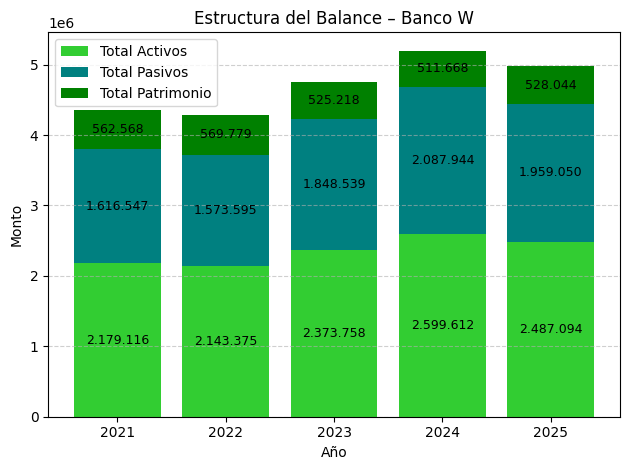

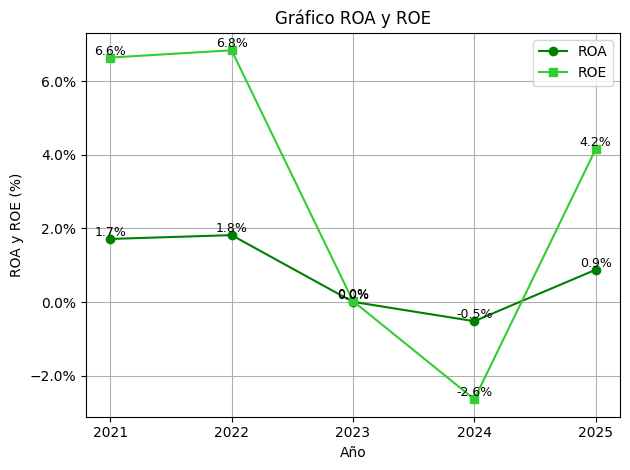

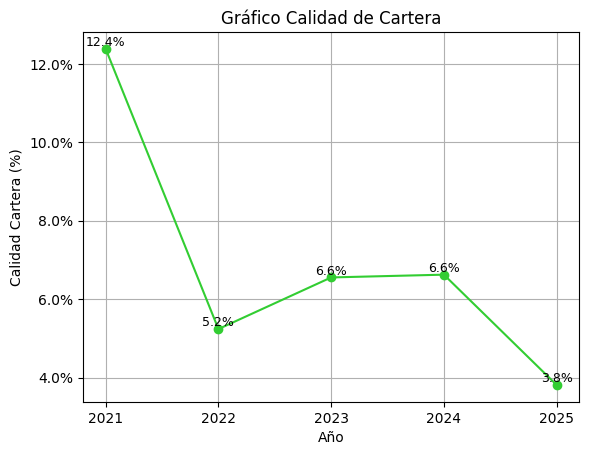

       Fecha  ALM promedio mes  RLN promedio mes       IRL      CFEN  \
0 2024-12-31      205883494025      123354483050  1.669039  0.988982   
1 2025-01-31      233052455380      102941910240  2.263922  1.042694   
2 2025-02-28      218285848525       92274295525  2.365619  1.053176   
3 2025-03-31      191987190875      106011536700  1.811003  1.025111   
4 2025-04-30      199570886425       77365988850  2.579569  1.027262   
5 2025-05-31      194857331160       80236030840  2.428551  1.022989   
6 2025-06-30      206266770825       91202541475  2.261634  1.030750   
7 2025-07-31      200986139125      148449348925  1.353904  1.040199   
8 2025-08-31      205359436540      145642193020  1.410027  1.035437   
9 2025-09-30      168414169250      118919306825  1.416205  1.027843   

   Margen Solv  
0       0.1691  
1       0.1675  
2       0.1666  
3       0.1680  
4       0.1682  
5       0.1787  
6       0.1788  
7       0.1814  
8       0.1820  
9       0.1987  


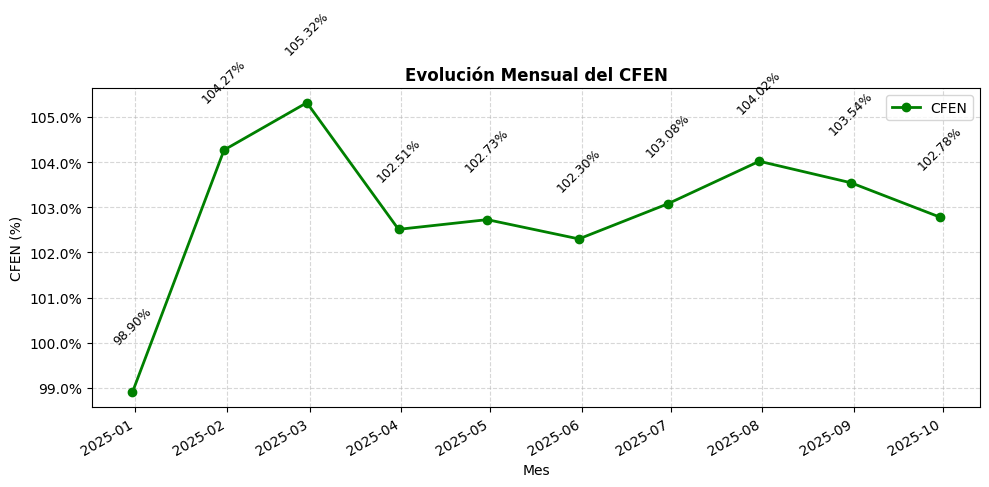

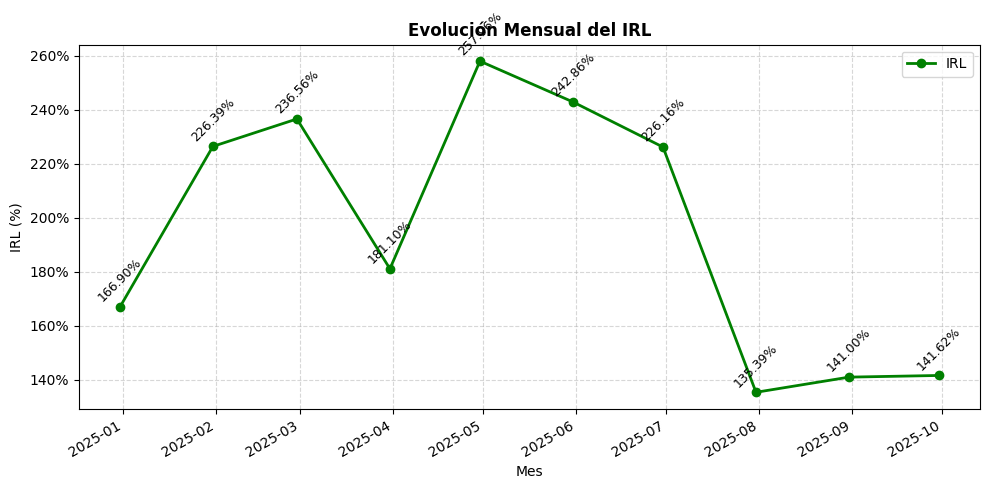

In [1]:
import pandas as pd


pd.set_option('display.max_columns', 12)

df = pd.read_excel("ig_2021-2025.xlsx", sheet_name="Balance consolidado")

print(df)

df.columns = df.columns.str.strip()
#Convertir la columna Fecha a datetime y extraer el año
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Año'] = df['Fecha'].dt.year
#Filtrar solo los rubros requeridos
rubros = ['Total Activos', 'Total Pasivos', 'Total Patrimonio']
df_filtrado = df[df['Rubro'].isin(rubros)]
#Quedarse solo con las columnas necesarias
df_bw = df_filtrado[['Rubro', 'Año', 'BANCO W S.A.']]
#Crear la tabla final (Rubro como filas, Años como columnas)
tabla_final = df_bw.pivot_table(
    index='Rubro',
    columns='Año',
    values='BANCO W S.A.',
    aggfunc='first'
)
#Ordenar columnas de 2021 a 2025
tabla_final = tabla_final[[2021, 2022, 2023, 2024, 2025]]
print(tabla_final)
import matplotlib.pyplot as plt

# Asegurar orden correcto
tabla_plot = tabla_final.loc[
    ['Total Activos', 'Total Pasivos', 'Total Patrimonio']
].T

plt.figure()

# Barras
b_activos = plt.bar(
    tabla_plot.index,
    tabla_plot['Total Activos'],
    label='Total Activos',
    color='limegreen'
)

b_pasivos = plt.bar(
    tabla_plot.index,
    tabla_plot['Total Pasivos'],
    bottom=tabla_plot['Total Activos'],
    label='Total Pasivos',
    color='teal'
)

b_patrimonio = plt.bar(
    tabla_plot.index,
    tabla_plot['Total Patrimonio'],
    bottom=tabla_plot['Total Activos'] + tabla_plot['Total Pasivos'],
    label='Total Patrimonio',
    color='green'
)

# Función para agregar etiquetas
def agregar_etiquetas(barras, valores_base=None):
    for i, barra in enumerate(barras):
        altura = barra.get_height()
        if altura == 0:
            continue
        
        base = valores_base[i] if valores_base is not None else 0
        y = base + altura / 2
        
        plt.text(
            barra.get_x() + barra.get_width() / 2,
            y,
            f"{int(altura):,}".replace(",", "."),
            ha='center',
            va='center',
            fontsize=9,
            color='black'
        )

# Agregar etiquetas a cada segmento
agregar_etiquetas(b_activos)
agregar_etiquetas(b_pasivos, tabla_plot['Total Activos'].values)
agregar_etiquetas(
    b_patrimonio,
    (tabla_plot['Total Activos'] + tabla_plot['Total Pasivos']).values
)

# Etiquetas y formato
plt.xlabel('Año')
plt.ylabel('Monto')
plt.title('Estructura del Balance – Banco W')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


#Con base en una hoja del archivo xls organizada previamente que agrupa los indicadores a analizar
#se procede a realizar alguna gráficas útiles para el análisis
import pandas as pd
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

ind = pd.read_excel(
    "ig_2021-2025.xlsx",
    sheet_name="Indicadores",
    skiprows=1
)

ind['Año'] = ind['Año'].astype(int)


#GRAFICA ROA y ROE
plt.figure()
# Graficar ROA y ROE
plt.plot(ind['Año'], ind['ROA'], marker='o', color='green', label='ROA')
plt.plot(ind['Año'], ind['ROE'], marker='s', color='limegreen', label='ROE')

# Etiquetas de datos en porcentaje
for x, y in zip(ind['Año'], ind['ROA']):
    plt.text(x, y, f'{y:.1%}', ha='center', va='bottom', fontsize=9)

for x, y in zip(ind['Año'], ind['ROE']):
    plt.text(x, y, f'{y:.1%}', ha='center', va='bottom', fontsize=9)

# Formato de eje Y en porcentaje
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

# Eje X solo con enteros
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.xlabel('Año')
plt.ylabel('ROA y ROE (%)')
plt.title('Gráfico ROA y ROE')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#GRAFICA INDICADOR CALIDAD DE CARTERA
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

ind['Año'] = ind['Año'].astype(int)

plt.figure()

plt.plot(ind['Año'], ind['Calidad Cartera'],
         marker='o', color='limegreen')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

for x, y in zip(ind['Año'], ind['Calidad Cartera']):
    plt.text(x, y, f'{y:.1%}',
             ha='center', va='bottom', fontsize=9)

plt.xticks(ind['Año'])
plt.xlabel('Año')
plt.ylabel('Calidad Cartera (%)')
plt.title('Gráfico Calidad de Cartera')
plt.grid(True)
plt.show()

#GRÁFICA IRL y CEFEN

ircef = pd.read_excel("ig_2021-2025.xlsx",sheet_name="IRL y CFEN")
print(ircef)

# Convertir Fecha a datetime
ircef['Fecha'] = pd.to_datetime(ircef['Fecha'])

plt.figure(figsize=(10,5))

# Graficar CFEN
plt.plot(ircef['Fecha'], ircef['CFEN'], marker='o', color='green', linewidth=2, label='CFEN')

# Formato eje Y en porcentaje
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

# Etiquetas de datos en porcentaje, ligeramente arriba del punto
for x, y in zip(ircef['Fecha'], ircef['CFEN']):
    plt.text(x, y + 0.01, f'{y:.2%}', ha='center', va='bottom', fontsize=9, rotation=45)

# Eje X como fecha, con buena separación
plt.gcf().autofmt_xdate()

# Etiquetas y título
plt.xlabel('Mes')
plt.ylabel('CFEN (%)')
plt.title('Evolución Mensual del CFEN', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

#Grafica IRL
ircef = pd.read_excel("ig_2021-2025.xlsx",sheet_name="IRL y CFEN")
ircef['Fecha'] = pd.to_datetime(ircef['Fecha'])
plt.figure(figsize=(10,5))
plt.plot(ircef['Fecha'], ircef['IRL'], marker='o', color='green', linewidth=2, label='IRL')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
for x, y in zip(ircef['Fecha'], ircef['IRL']):
    plt.text(x, y + 0.01, f'{y:.2%}', ha='center', va='bottom', fontsize=9, rotation=45)
plt.gcf().autofmt_xdate()
plt.xlabel('Mes')
plt.ylabel('IRL (%)')
plt.title('Evolución Mensual del IRL', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

